# Previsão do Valor Médio de Imóveis com Modelos de Regressão

O objetivo deste projeto é desenvolver um modelo de regressão capaz de estimar o valor médio de imóveis.

In [ ]:

# Manipulação de dados e análise exploratória
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Machine learning
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV # Adicionado para otimização
from sklearn.tree import plot_tree


print("✅ bibliotecas importadas com sucesso!")

✅ bibliotecas importadas com sucesso!


In [ ]:
# Carregamento de dados
df = pd.read_csv('housing.csv')

# Verificação da estrutura do dataset
print("✅ Dataset carregado com sucesso!")
print("="*100)
print("                         INFORMAÇÕES SOBRE A ESTRUTURA DO DATASET:\n")
print("\n")
print(df.info())
print("="*100)

✅ Dataset carregado com sucesso!
                         INFORMAÇÕES SOBRE A ESTRUTURA DO DATASET:



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


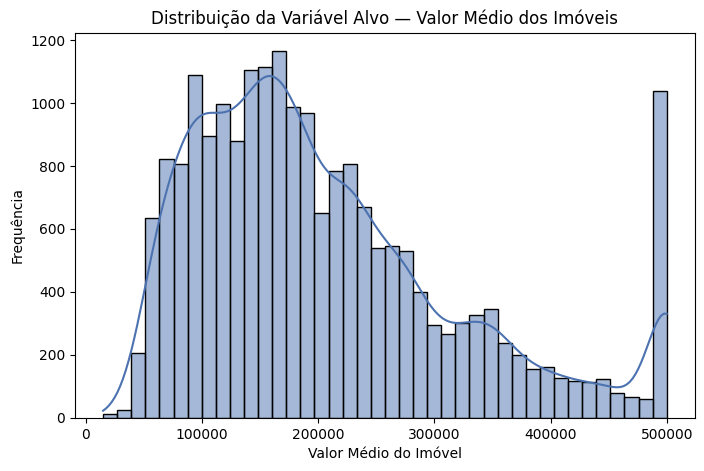


             🔎 PRINCIPAIS PONTOS OBSERVADOS
CONCENTRAÇÃO CENTRAL: a maior parte dos imóveis está concentrada aproximadamente entre 
100 mil e 250 mil, sugerindo que esse é o intervalo mais representativo do mercado analisado.

POSSÍVEIS OUTLIERS: A assimetria observada não impede a utilização direta da variável alvo no treinamento do modelo.

A presença de valores extremos pode influenciar a estrutura da árvore, o que reforça a importância de: 
• Controlar a profundidade da árvore; 
• Avaliar métricas em dados de validação.

O teto no valor máximo deve ser considerado na interpretação dos erros do modelo, especialmente para imóveis de maior valor.


In [ ]:
# Análise exploratória
# Visualização da distribuição da variável alvo (Target)
plt.figure(figsize=(8, 5))
sns.histplot(
    data=df,
    x='median_house_value',
    bins=40,
    kde=True,
    color='#4C72B0'
)

plt.title('Distribuição da Variável Alvo — Valor Médio dos Imóveis')
plt.xlabel('Valor Médio do Imóvel')
plt.ylabel('Frequência')
plt.show()

# Insight
print("\n             🔎 PRINCIPAIS PONTOS OBSERVADOS")
print("="*117)
print("CONCENTRAÇÃO CENTRAL: a maior parte dos imóveis está concentrada aproximadamente entre \n" \
"100 mil e 250 mil, sugerindo que esse é o intervalo mais representativo do mercado analisado.\n")
print("POSSÍVEIS OUTLIERS: A assimetria observada não impede a utilização direta da variável alvo no treinamento do modelo.\n")
print("A presença de valores extremos pode influenciar a estrutura da árvore, o que reforça a importância de: \n" \
"• Controlar a profundidade da árvore; \n" \
"• Avaliar métricas em dados de validação.\n")
print("O teto no valor máximo deve ser considerado na interpretação dos erros do modelo, especialmente para imóveis de maior valor.")

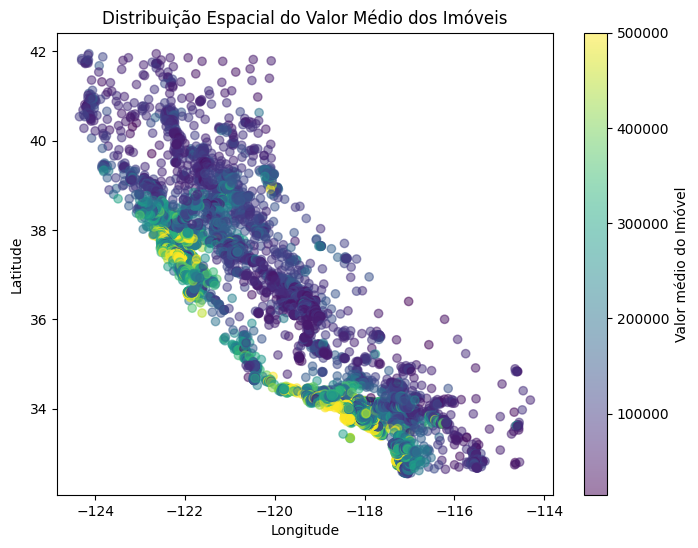


             📍 PRINCIPAIS PONTOS OBSERVADOS
CLUSTERS DE ALTO VALOR:
Observa-se uma concentração de imóveis com valores mais elevados (tons claros).
Isso sugere que a proximidade com o litoral está associada a maior valorização imobiliária.

PADRÃO NÃO ALEATÓRIO:
A distribuição não ocorre de forma homogênea no espaço, mas sim em AGLOMERADOS REGIONAIS,
reforçando que latitude e longitude carregam informação preditiva relevante.


In [ ]:
# Análise exploratória
# Visualização da distribuição espacial da variável alvo (Target) usando as variáveis qualitativas 'Longitude' e 'Latitude'.
plt.figure(figsize=(8,6))
plt.scatter(
    df['longitude'],
    df['latitude'],
    c=df['median_house_value'],
    cmap='viridis',
    alpha=0.5
)

plt.colorbar(label='Valor médio do Imóvel')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribuição Espacial do Valor Médio dos Imóveis')
plt.show()

# Insight
print("\n             📍 PRINCIPAIS PONTOS OBSERVADOS")
print("="*92)
print("CLUSTERS DE ALTO VALOR:\n"
"Observa-se uma concentração de imóveis com valores mais elevados (tons claros).\n" \
"Isso sugere que a proximidade com o litoral está associada a maior valorização imobiliária.\n")
print("PADRÃO NÃO ALEATÓRIO:\n" \
"A distribuição não ocorre de forma homogênea no espaço, mas sim em AGLOMERADOS REGIONAIS,\n" \
"reforçando que latitude e longitude carregam informação preditiva relevante.")


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000



🧮 Interpretação da matriz de correlação de Pearson 'p' (+ ou -)
🔴 P= 0.00 a 0.19 | Uma correlação bem fraca
🟠 P= 0.20 a 0.39 | Uma correlação fraca
🟡 P= 0.40 a 0.69 | Uma correlação moderada
🔵 P= 0.70 a 0.89 | Uma correlação forte
🟢 P= 0.90 a 1.00 | Uma correlação muito forte


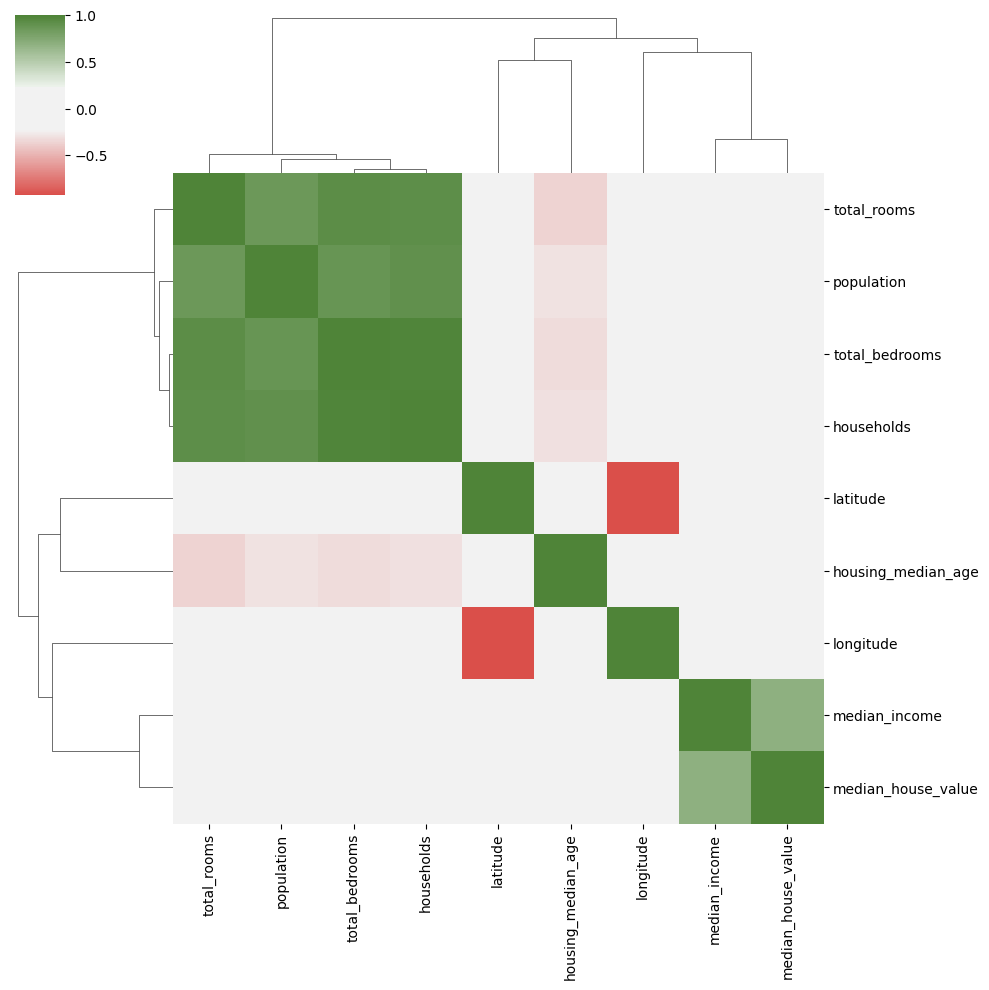



📋CORRELAÇÃO ENTRE VARIÁVEIS QUALITATIVAS E VARIÁVEL TARGET 'median_house_value':
A variável median_value_house e median_income tem uma correlação considerada moderada
e com forte potencial preditivo.


In [ ]:
# Visualização da matriz de correlação expandida
cmap = sns.diverging_palette(h_neg=13, h_pos=120, as_cmap=True, sep=60, center='light')
sns.clustermap(df.corr(numeric_only=True),
                figsize=(10,10),
                center=0, cmap= cmap)

# Visualização da interpretação da matriz de correlação de Pearson 'p' para auxiliar na análise exploratória e geração de insights
display(df.corr(numeric_only=True))
print("\n🧮 Interpretação da matriz de correlação de Pearson 'p' (+ ou -)")
print("="*145)
print("🔴 P= 0.00 a 0.19 | Uma correlação bem fraca")
print("🟠 P= 0.20 a 0.39 | Uma correlação fraca")
print("🟡 P= 0.40 a 0.69 | Uma correlação moderada")
print("🔵 P= 0.70 a 0.89 | Uma correlação forte")
print("🟢 P= 0.90 a 1.00 | Uma correlação muito forte")
print("="*145)

plt.show()

# Insight
print("\n")
print("📋CORRELAÇÃO ENTRE VARIÁVEIS QUALITATIVAS E VARIÁVEL TARGET 'median_house_value':")
print("="*145)
print(
    "A variável median_value_house e median_income tem uma correlação considerada moderada\n"
    "e com forte potencial preditivo.")

In [ ]:
# Preparação da variável X para construção do modelo
X = df.drop(columns=['total_bedrooms', 'median_house_value']).copy()

# Transformação da variável X para colunas que apresentam tipos de dados categocategóricas (texto) em variáveis numéricas para que o modelo consiga interpretar
X = pd.get_dummies(X, drop_first=True)

# Resultados das transformações realizadas
print("                         STATUS DO PROCESSAMENTO E TRANSFORMAÇÃO DOS DADOS:\n")
print("🗑️Colunas removidas por dados faltantes: total_bedrooms.\n")
print("🔢Tranformação das variáveis categóricas para númericas concluída!\n")
print("="*100)
print("\n")

# Verificação do resultado da estrutura da variável X
print("                         INFORMAÇÕES SOBRE A ESTRUTURA DO DATASET:\n")
print(X.info())
print("="*100)

X.head()

                         STATUS DO PROCESSAMENTO E TRANSFORMAÇÃO DOS DADOS:

🗑️Colunas removidas por dados faltantes: total_bedrooms.

🔢Tranformação das variáveis categóricas para númericas concluída!



                         INFORMAÇÕES SOBRE A ESTRUTURA DO DATASET:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   population                  20640 non-null  float64
 5   households                  20640 non-null  float64
 6   median_income               20640 non-null  float64
 7   ocean_proximity_INLAND      20640 non-null  bool   
 8   ocean_proximity_ISLAND      20640 non-null  

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,False,False,True,False
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,False,False,True,False
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,False,False,True,False
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,False,False,True,False
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,False,False,True,False


In [ ]:
# Preparação da variável y para construção do modelo
y = df.loc[:,'median_house_value']

# Verificação do resultado da estrutura da variável y
print("RETORNO DA VARIÁVEL TARGET:\n")
print(y.head())
print("="*50)

RETORNO DA VARIÁVEL TARGET:

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64


In [ ]:
# Divisão entre base de treino e base de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

print("✅ Dataset dividido entre base de treino e base de teste.")

✅ Dataset dividido entre base de treino e base de teste.


In [ ]:
# Construção de duas árvores de decisão com profundidades diferentes
regr_1 = DecisionTreeRegressor(max_depth=6)
regr_2 = DecisionTreeRegressor(max_depth=8)

print("="*60)
print("🧪 Serão experimentadas duas árvores de regressão sendo elas:\n")
print("regr_1 com profundidade 6.")
print("regr_2 com produnfidade 8.\n")

# Treinamento das duas árvores
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

print("="*60)
print("✅Treino finalizado!")


🧪 Serão experimentadas duas árvores de regressão sendo elas:

regr_1 com profundidade 6.
regr_2 com produnfidade 8.

✅Treino finalizado!


In [ ]:
# MSE = mean_square_error
# Cálculo do MSE para decisão da profundidade que será utilizada
mse1 = regr_1.score(X_train, y_train)
mse2 = regr_2.score(X_train, y_train)

template = "O mse da árvore com profundidade={0} é: {1:.2f}"

print("🤖 RESULTADO DE TREINO DO MODELO DE REGRESSÃO")
print("="*50)
print(template.format(regr_1.get_depth(), mse1).replace(".",","))
print(template.format(regr_2.get_depth(), mse2).replace(".",","))
print("="*50)
print("\n🧠 CONCLUSÃO: Comparando os modelos, a árvore com profundidade 2 apresentou menor MSE, indicando melhor desempenho preditivo em relação à árvore mais profunda, que não trouxe ganhos adicionais e pode indicar sobreajuste.")

🤖 RESULTADO DE TREINO DO MODELO DE REGRESSÃO
O mse da árvore com profundidade=6 é: 0,69
O mse da árvore com profundidade=8 é: 0,76

🧠 CONCLUSÃO: Comparando os modelos, a árvore com profundidade 2 apresentou menor MSE, indicando melhor desempenho preditivo em relação à árvore mais profunda, que não trouxe ganhos adicionais e pode indicar sobreajuste.


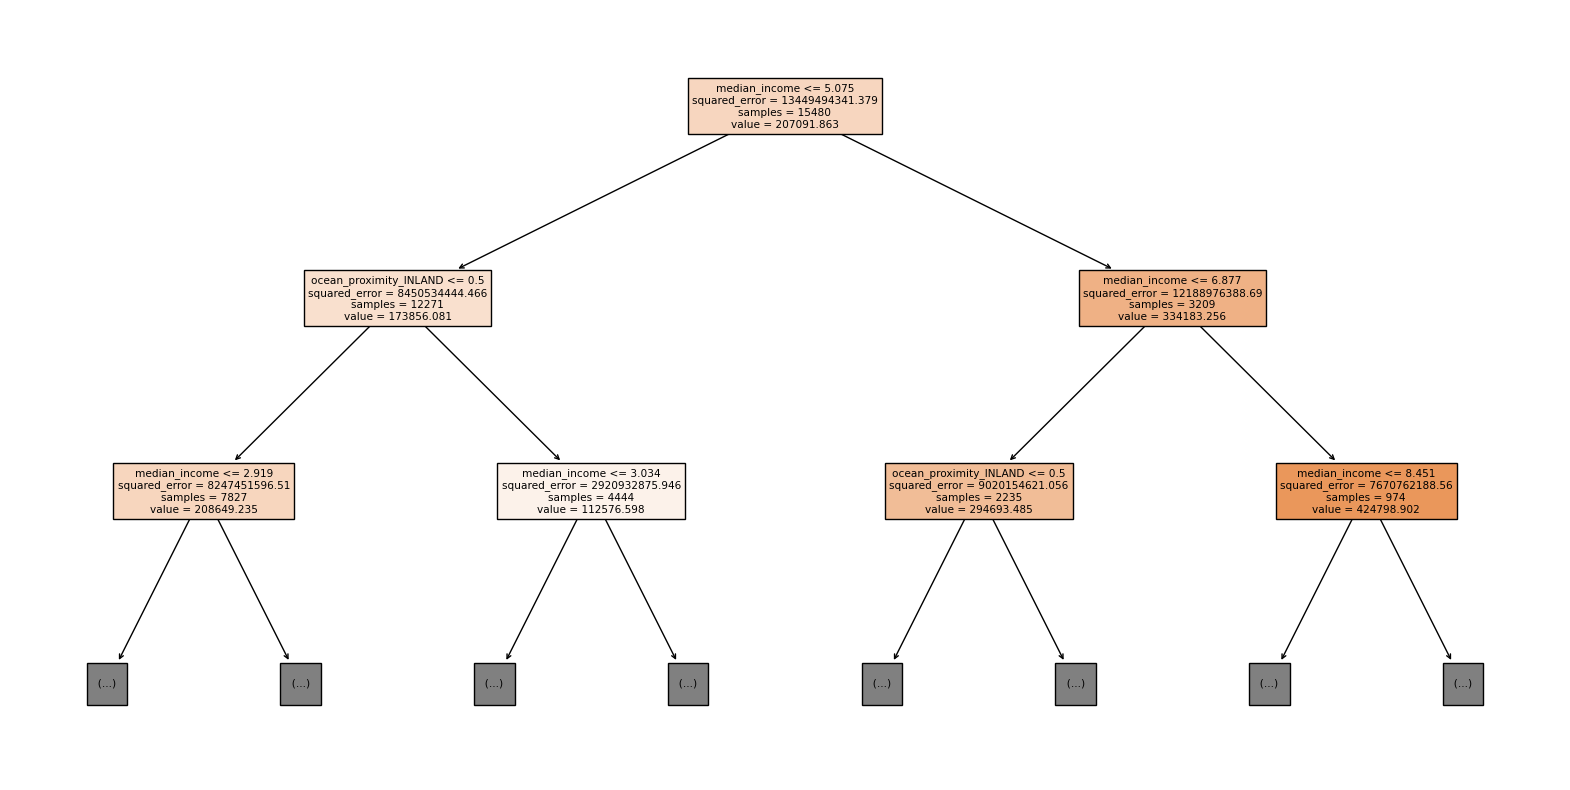

In [ ]:
# Visualização resumida da árvore com profundiade 6 'regr_1'
plt.rc('figure', figsize=(20,10))
tp = tree.plot_tree(regr_1,
                    feature_names=X.columns,
                    filled=True,
                    max_depth=2)

In [ ]:
# Inicio da pós poda, para otimização do modelo utilizando o CCP(Cost-Complexity Pruning ou poda por custo-complexidade) na base de treino
print("✅Solicitação do CCP para pós-poda")
print("="*100)
print("                             📌RESULTADO DO CCP")

# Solicitação do CCP na base de treino
path = regr_1.cost_complexity_pruning_path(X_train, y_train)
path

✅Solicitação do CCP para pós-poda
                             📌RESULTADO DO CCP


{'ccp_alphas': array([0.00000000e+00, 4.00617733e+05, 1.16631228e+06, 2.31356933e+06,
        2.64445363e+06, 2.85663713e+06, 4.21261974e+06, 4.66529041e+06,
        5.28354062e+06, 5.62296560e+06, 6.39533603e+06, 6.81239170e+06,
        6.93756374e+06, 7.84172231e+06, 8.19378449e+06, 8.23216854e+06,
        8.79575986e+06, 9.16652422e+06, 9.48514170e+06, 9.55743867e+06,
        1.01391253e+07, 1.03077089e+07, 1.04747181e+07, 1.04763912e+07,
        1.09517845e+07, 1.22258024e+07, 1.43165798e+07, 1.45506823e+07,
        1.48443473e+07, 1.59142403e+07, 1.92458635e+07, 1.94591158e+07,
        2.13705497e+07, 2.17516779e+07, 2.30779497e+07, 2.31579031e+07,
        2.66663670e+07, 3.28762636e+07, 3.74178879e+07, 4.22580108e+07,
        5.35215851e+07, 5.43645725e+07, 6.11279858e+07, 6.85452254e+07,
        6.89783619e+07, 9.39043130e+07, 9.93088759e+07, 1.14324612e+08,
        1.65019048e+08, 1.69207540e+08, 1.87125163e+08, 2.11180012e+08,
        5.24624058e+08, 7.41799566e+08, 1.69012137

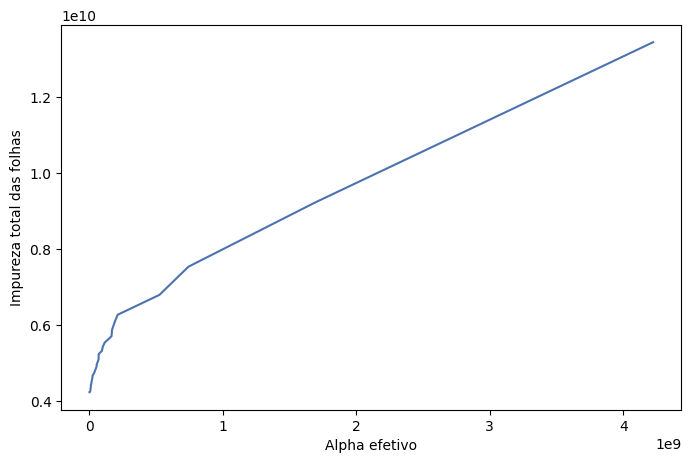


                         📍 PRINCIPAIS PONTOS OBSERVADOS
Observa-se que a impureza total das folhas aumenta de forma contínua com o crescimento do
'ccp_alpha', sem a presença de um ponto de inflexão bem definido. Isso sugere que a árvore não
apresenta ganhos claros de generalização ao ser podada, indicando limitações na capacidade preditiva
do modelo com as variáveis disponíveis.


In [ ]:
# Análise exploratória do CCP para identificar comportantamento da impureza em relação ao alpha
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(8,5))

plt.plot(ccp_alphas, impurities, color ='#4C72B0')

plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")
plt.show()

print("\n                         📍 PRINCIPAIS PONTOS OBSERVADOS")
print("="*92)
print("Observa-se que a impureza total das folhas aumenta de forma contínua com o crescimento do\n" \
"'ccp_alpha', sem a presença de um ponto de inflexão bem definido. Isso sugere que a árvore não\n" \
"apresenta ganhos claros de generalização ao ser podada, indicando limitações na capacidade preditiva\n" \
"do modelo com as variáveis disponíveis.")

In [ ]:
# Treinamento de árvores para cada ccp
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
print("✅Árvores armazenadas na lista 'clfs'")

✅Árvores armazenadas na lista 'clfs'


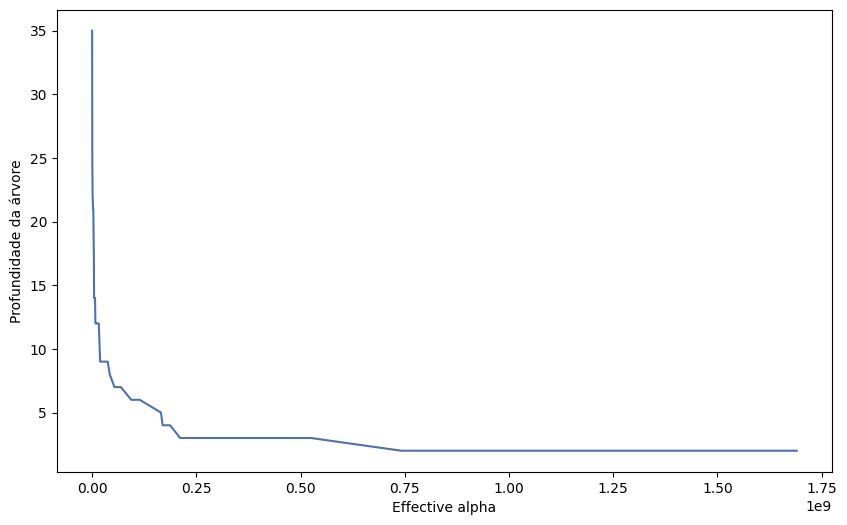


                         📍 PRINCIPAIS PONTOS OBSERVADOS
Observa-se que o aumento do 'ccp_alpha' reduz significativamente a profundidade da árvore,
especialmente para pequenos valores do parâmetro. A partir de determinado ponto, a profundidade se
estabiliza, indicando que a árvore atinge sua estrutura mínima. No entanto, essa redução de
complexidade não se traduz em ganhos relevantes de desempenho, sugerindo que a limitação do
modelo não está relacionada ao overfitting.


In [ ]:
# Análise exploratória para interpretação do comportamento da profundidade da árvore em relação ao alpha
tree_depths = [clf.tree_.max_depth for clf in clfs]

plt.figure(figsize=(10,6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1], color='#4C72B0')
plt.xlabel("Effective alpha")
plt.ylabel("Profundidade da árvore")
plt.show()


print("\n                         📍 PRINCIPAIS PONTOS OBSERVADOS")
print("="*92)
print("Observa-se que o aumento do 'ccp_alpha' reduz significativamente a profundidade da árvore,\n" \
"especialmente para pequenos valores do parâmetro. A partir de determinado ponto, a profundidade se\n" \
"estabiliza, indicando que a árvore atinge sua estrutura mínima. No entanto, essa redução de\n" \
"complexidade não se traduz em ganhos relevantes de desempenho, sugerindo que a limitação do\n" \
"modelo não está relacionada ao overfitting.")

In [ ]:
# MSE para cada árvore da lista de árvores na base de treino e teste
train_scores = [mean_squared_error(y_train, clf.predict(X_train)) for clf in clfs]
test_scores = [mean_squared_error(y_test, clf.predict(X_test)) for clf in clfs]

print("✅ Os MSE de cada árvore na base de treino e teste foram calculados e armazenados.")

✅ Os MSE de cada árvore na base de treino e teste foram calculados e armazenados.


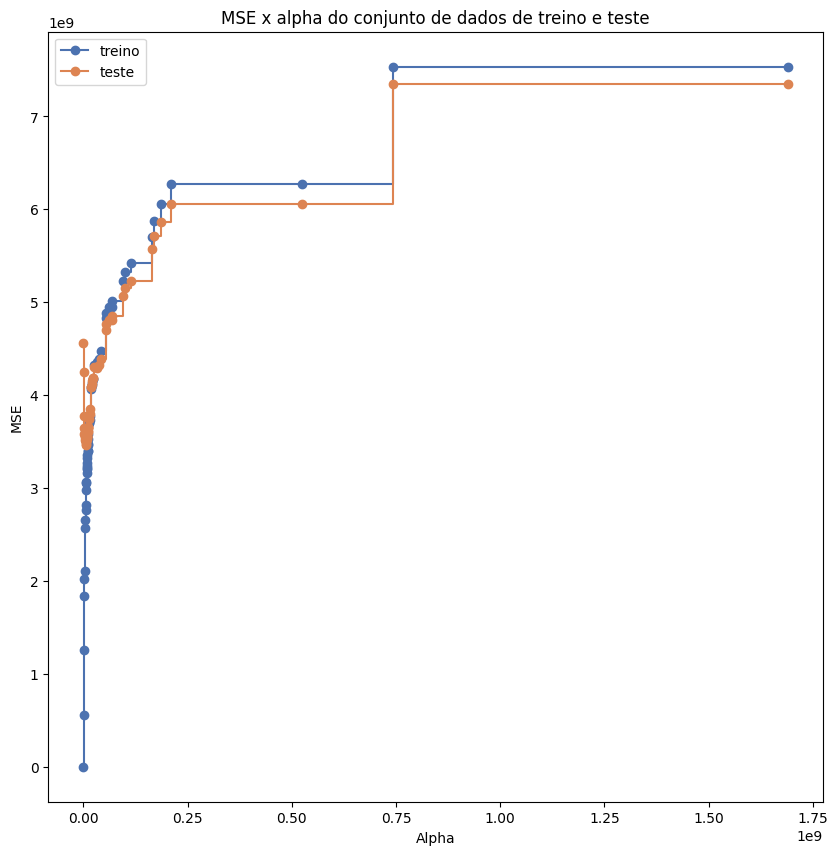

In [ ]:
# Análise exploratória do MSE em relação alpha para otimização do modelo
fig, ax = plt.subplots()

ax.set_xlabel("Alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")

ax.plot(ccp_alphas[:-1],
         train_scores[:-1],
         marker='o',
         label="treino", 
         drawstyle="steps-post",
         color = '#4C72B0')

ax.plot(ccp_alphas[:-1],
        test_scores[:-1],
        marker='o', label="teste", 
        drawstyle="steps-post",
        color='#DD8452')

ax.legend()
plt.show()

In [ ]:
# Grid search para otimização de hiperparâmetros (versão simplificada)
alphas = np.logspace(-4, 2, 50)  # 0.0001 até 100

ridge = Ridge()

grid = GridSearchCV(
    ridge,
    param_grid={'alpha': alphas},
    scoring='neg_mean_squared_error',
    cv=5
)

grid.fit(X_train, y_train)

best_alpha = grid.best_params_['alpha']
best_mse = -grid.best_score_


print("                                 🧠 RESPOSTA DA VALIDAÇÃO CRUZADA")
print("="*100)
print(f"Best_alpha:{best_alpha}\n" \
f"best_mse:{best_mse}")
print(f"\nO parâmetro de regularização alpha foi selecionado por meio de validação cruzada com GridSearchCV,\n" \
f"utilizando como critério a minimização do erro quadrático médio (MSE). O valor ótimo encontrado foi\n" \
f"α ≈ {best_alpha:.2f}, representando o melhor compromisso entre viés e variância. Valores menores resultaram em maior\n" \
f"risco de overfitting, enquanto valores maiores levaram ao underfitting.")

                                 🧠 RESPOSTA DA VALIDAÇÃO CRUZADA
Best_alpha:0.2682695795279725
best_mse:4793462102.038913

O parâmetro de regularização alpha foi selecionado por meio de validação cruzada com GridSearchCV,
utilizando como critério a minimização do erro quadrático médio (MSE). O valor ótimo encontrado foi
α ≈ 0.27, representando o melhor compromisso entre viés e variância. Valores menores resultaram em maior
risco de overfitting, enquanto valores maiores levaram ao underfitting.


In [ ]:
# Procura do melhor alpha na lista de alphas
best_index = np.argmin(np.abs(ccp_alphas - best_alpha))

print(f"O index que armazena o 'best_alpha' é: [{best_index}]")

O index que armazena o 'best_alpha' é: [0]


In [ ]:
# R² do modelo otimizado
best_tree = clfs[best_index]

r2_train = r2_score(y_train, best_tree.predict(X_train))
r2_test = r2_score(y_test, best_tree.predict(X_test))

print("            🤖 ÁRVORE DE REGRESSÃO")
print("="* 50)
print(f"R² (treino) da árvore podada: {r2_train:.4f}")
print(f"R² (teste) da árvore podada:  {r2_test:.4f}")


            🤖 ÁRVORE DE REGRESSÃO
R² (treino) da árvore podada: 1.0000
R² (teste) da árvore podada:  0.6466


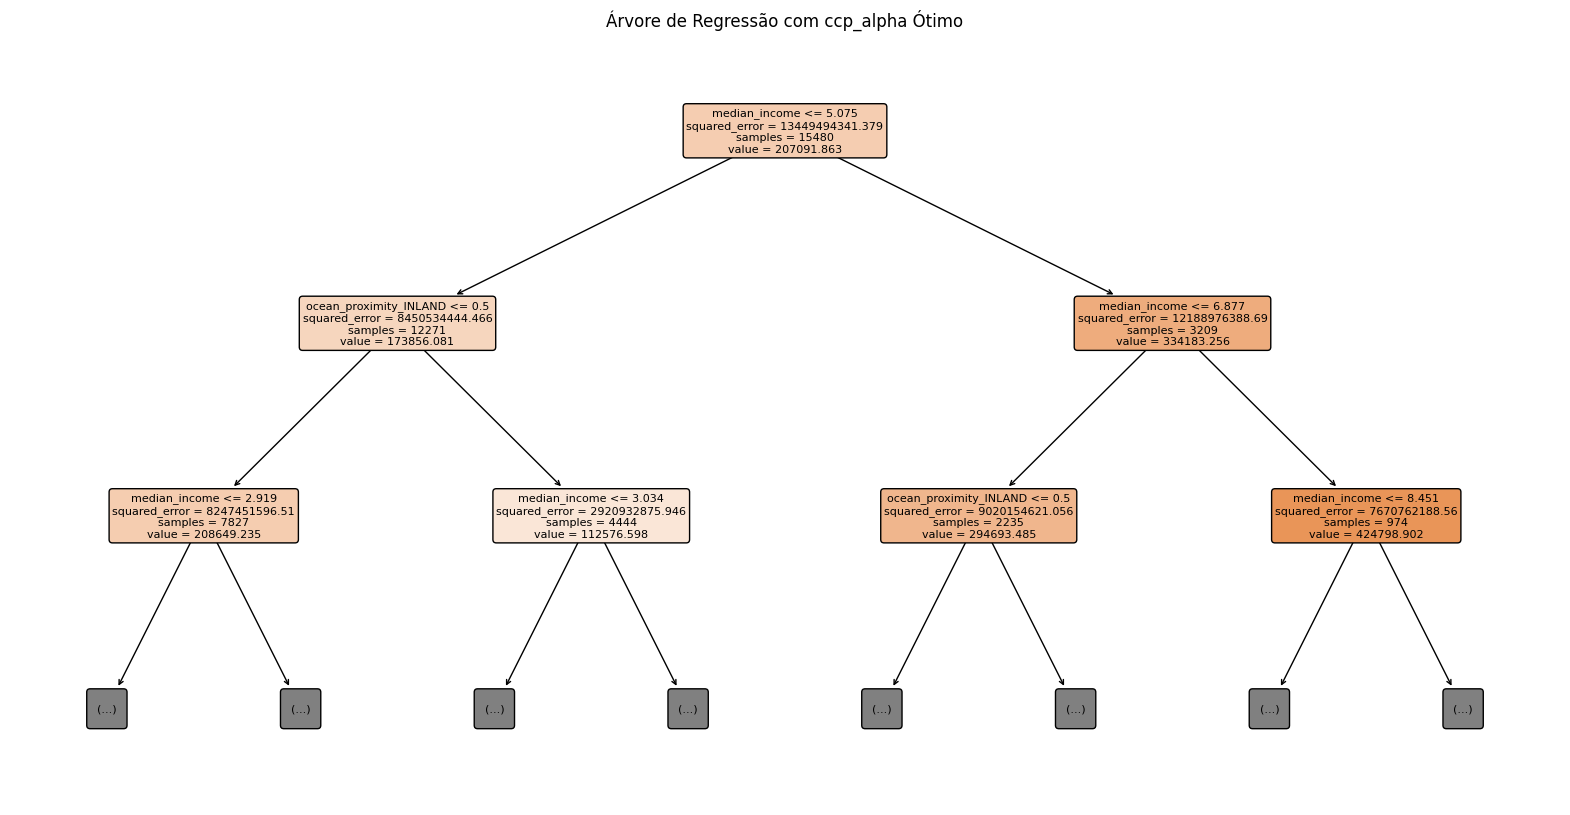

In [ ]:
# Visualização da árvore após otimização do modelo
plt.figure(figsize=(20, 10))

plot_tree(
    best_tree,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    fontsize=8,
    max_depth=2
)

plt.title("Árvore de Regressão com ccp_alpha Ótimo")
plt.show()